In [15]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split,StratifiedKFold # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score

In [16]:
col_names = ['IPK', 'Pendapatan', 'JumlahTanggungan', 'Keputusan']

# load dataset
# pima = pd.read_csv("/content/dataset riska - dataset.csv", header=None, names=col_names, skiprows=1)
pima = pd.read_csv("/content/dataset beasiswa.csv", header=None, names=col_names, skiprows=1)

# Buat LabelEncoder untuk kolom kategorikal
# le_ipk = LabelEncoder()
# le_pendapatan = LabelEncoder()
# le_beasiswa = LabelEncoder()
le_keputusan = LabelEncoder()
# le_jumlah_tanggungan = LabelEncoder()

# Transform kolom kategorikal jadi angka
# pima['IPK'] = le_ipk.fit_transform(pima['IPK'])
pima['IPK'] = pima['IPK'].replace({',': '.'}, regex=True).astype(float)
# pima['Pendapatan'] = le_pendapatan.fit_transform(pima['Pendapatan'])
pima['Pendapatan'] = pima['Pendapatan'].replace({',': ''}, regex=True).astype(float)
# pima['JumlahTanggungan'] = le_jumlah_tanggungan.fit_transform(pima['JumlahTanggungan'])
pima['JumlahTanggungan'] = pd.to_numeric(pima['JumlahTanggungan'])
# pima['PernahBeasiswa'] = le_beasiswa.fit_transform(pima['PernahBeasiswa'])
pima['Keputusan'] = le_keputusan.fit_transform(pima['Keputusan'])

# print("Label Index for IPK:")
# print(dict(zip(le_ipk.classes_, le_ipk.transform(le_ipk.classes_))))

# print("\nLabel Index for Pendapatan:")
# print(dict(zip(le_pendapatan.classes_, le_pendapatan.transform(le_pendapatan.classes_))))

# print("\nLabel Index for JumlahTanggungan:")
# print(dict(zip(le_jumlah_tanggungan.classes_, le_jumlah_tanggungan.transform(le_jumlah_tanggungan.classes_))))

# print("\nLabel Index for PernahBeasiswa:")
# print(dict(zip(le_beasiswa.classes_, le_beasiswa.transform(le_beasiswa.classes_))))

print("\nLabel Index for Keputusan:")
print(dict(zip(le_keputusan.classes_, le_keputusan.transform(le_keputusan.classes_))))

pima.head()


Label Index for Keputusan:
{'LAYAK': np.int64(0), 'TIDAK LAYAK': np.int64(1)}


,,IPK,Pendapatan,JumlahTanggungan,Keputusan
Fayza,10121283,3.76,2000000.0,3,0
Muhamad Daffi Wianda Putra,10121310,3.56,2000000.0,3,0
Hendrawan,21121222,3.26,3000000.0,4,1
Devi Candra Puspita,21121417,3.47,4000000.0,5,0
Muhamad Iqbal,21121421,2.07,5000000.0,4,1


# Model 1 (pembagian dataset 70:30)

In [17]:
# 1. Pisahkan dataset menjadi fitur dan target
feature_cols = ['IPK', 'Pendapatan', 'JumlahTanggungan']
X = pima[feature_cols]         # Variabel fitur (independen)
y = pima['Keputusan']          # Variabel target (dependen)

# 2. Bagi dataset menjadi data latih dan data uji (70% latih, 30% uji)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

# 3. Buat objek klasifikasi Decision Tree (Pohon Keputusan)
clf = DecisionTreeClassifier()

# 4. Latih model dengan data latih
clf = clf.fit(X_train, y_train)

# 5. Prediksi hasil untuk data uji
y_pred = clf.predict(X_test)

# 6. Hitung metrik evaluasi
akurasi_1 = accuracy_score(y_test, y_pred)
recall_1 = recall_score(y_test, y_pred, pos_label=0)  # Asumsi 'ya' adalah kelas positif
f1_1 = f1_score(y_test, y_pred, pos_label=0)

# 7. Tampilkan hasil evaluasi
print("Akurasi :", round(akurasi_1, 4)*100, "%")
print("Recall (Sensitivitas) :", round(recall_1, 4)*100, "%")
print("F1-score :", round(f1_1, 4)*100, "%")

# 8. Tampilkan laporan klasifikasi lengkap
print("\nLaporan Klasifikasi:\n")
print(classification_report(y_test, y_pred, target_names=['tidak', 'ya']))

Akurasi : 100.0 %
Recall (Sensitivitas) : 100.0 %
F1-score : 100.0 %

Laporan Klasifikasi:

              precision    recall  f1-score   support

       tidak       1.00      1.00      1.00        15
          ya       1.00      1.00      1.00        75

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



# Model 2 (pembagian dataset 80:20)

In [18]:
# 1. Pisahkan dataset menjadi fitur dan target
feature_cols = ['IPK', 'Pendapatan', 'JumlahTanggungan']
X = pima[feature_cols]         # Variabel fitur (independen)
y = pima['Keputusan']          # Variabel target (dependen)

# 2. Bagi dataset menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# 3. Buat objek klasifikasi Decision Tree (Pohon Keputusan)
clf = DecisionTreeClassifier()

# 4. Latih model dengan data latih
clf = clf.fit(X_train, y_train)

# 5. Prediksi hasil untuk data uji
y_pred = clf.predict(X_test)

# 6. Hitung metrik evaluasi
akurasi_2 = accuracy_score(y_test, y_pred)
recall_2 = recall_score(y_test, y_pred, pos_label=0)  # Asumsi 'ya' adalah kelas positif
f1_2 = f1_score(y_test, y_pred, pos_label=0)

# 7. Tampilkan hasil evaluasi
print("Akurasi :", round(akurasi_2, 4)*100, "%")
print("Recall (Sensitivitas) :", round(recall_2, 4)*100, "%")
print("F1-score :", round(f1_2, 4)*100, "%")

# 8. Tampilkan laporan klasifikasi lengkap
print("\nLaporan Klasifikasi:\n")
print(classification_report(y_test, y_pred, target_names=['tidak', 'ya']))

Akurasi : 100.0 %
Recall (Sensitivitas) : 100.0 %
F1-score : 100.0 %

Laporan Klasifikasi:

              precision    recall  f1-score   support

       tidak       1.00      1.00      1.00        10
          ya       1.00      1.00      1.00        50

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



# Model 3 (pembagian dataset dengan bantuan k-fold, k=3)

In [19]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
fold = 1

accuracies = []
recalls = []
f1_scores = []

best_model = None
best_acc = 0
best_fold = 0
akurasi_3 = 0
recall_3 = 0
f1_3 = 0

# pastikan le_keputusan sudah fit!
positive_label = le_keputusan.transform(['LAYAK'])[0]

for train_index, test_index in skf.split(X, y):
    print(f"\n🧪 Fold {fold}")
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(X_train_fold, y_train_fold)
    y_pred_fold = clf.predict(X_test_fold)

    acc = accuracy_score(y_test_fold, y_pred_fold)
    rec = recall_score(y_test_fold, y_pred_fold, pos_label=positive_label)
    f1 = f1_score(y_test_fold, y_pred_fold, pos_label=positive_label)

    print(f"Accuracy  : {round(acc, 4)*100}%")
    print(f"Recall R1 : {round(rec, 4)*100}%")
    print(f"F1-Score  : {round(f1, 4)*100}%")

    # Cek model terbaik
    if acc > best_acc:
        best_acc = f1
        best_model = clf
        best_fold = fold
        akurasi_3 = acc
        recall_3 = rec
        f1_3 = f1

    accuracies.append(acc)
    recalls.append(rec)
    f1_scores.append(f1)

    fold += 1

# Rata-rata hasil
print("\n📊 Rata-rata dari 5 Fold:")
print(f"Average Accuracy  : {round(sum(accuracies)/len(accuracies),4)*100}%")
print(f"Average Recall R1 : {round(sum(recalls)/len(recalls),4)*100}%")
print(f"Average F1-Score  : {round(sum(f1_scores)/len(f1_scores),4)*100}%")

print(f"\n🏆 Model terbaik ada di Fold {best_fold} dengan Accuracy: {best_acc:.4f}")


🧪 Fold 1
Accuracy  : 100.0%
Recall R1 : 100.0%
F1-Score  : 100.0%

🧪 Fold 2
Accuracy  : 99.0%
Recall R1 : 92.86%
F1-Score  : 96.3%

🧪 Fold 3
Accuracy  : 100.0%
Recall R1 : 100.0%
F1-Score  : 100.0%

📊 Rata-rata dari 5 Fold:
Average Accuracy  : 99.67%
Average Recall R1 : 97.61999999999999%
Average F1-Score  : 98.77%

🏆 Model terbaik ada di Fold 1 dengan Accuracy: 1.0000


# Model 4 (pembagian dataset dengan bantuan k-fold, k=5)

In [20]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
fold = 1

accuracies = []
recalls = []
f1_scores = []

best_model = None
best_acc = 0
best_fold = 0
akurasi_4 = 0
recall_4 = 0
f1_4 = 0

# pastikan le_keputusan sudah fit!
positive_label = le_keputusan.transform(['LAYAK'])[0]

for train_index, test_index in skf.split(X, y):
    print(f"\n🧪 Fold {fold}")
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(X_train_fold, y_train_fold)
    y_pred_fold = clf.predict(X_test_fold)

    acc = accuracy_score(y_test_fold, y_pred_fold)
    rec = recall_score(y_test_fold, y_pred_fold, pos_label=positive_label)
    f1 = f1_score(y_test_fold, y_pred_fold, pos_label=positive_label)

    print(f"Accuracy  : {round(acc, 4)*100}%")
    print(f"Recall R1 : {round(rec, 4)*100}%")
    print(f"F1-Score  : {round(f1, 4)*100}%")

    # Cek model terbaik
    if acc > best_acc:
        best_acc = f1
        best_model = clf
        best_fold = fold
        akurasi_4 = acc
        recall_4 = rec
        f1_4 = f1

    accuracies.append(acc)
    recalls.append(rec)
    f1_scores.append(f1)

    fold += 1

# Rata-rata hasil
print("\n📊 Rata-rata dari 5 Fold:")
print(f"Average Accuracy  : {round(sum(accuracies)/len(accuracies),4)*100}%")
print(f"Average Recall R1 : {round(sum(recalls)/len(recalls),4)*100}%")
print(f"Average F1-Score  : {round(sum(f1_scores)/len(f1_scores),4)*100}%")

print(f"\n🏆 Model terbaik ada di Fold {best_fold} dengan Accuracy: {best_acc:.4f}")


🧪 Fold 1
Accuracy  : 100.0%
Recall R1 : 100.0%
F1-Score  : 100.0%

🧪 Fold 2
Accuracy  : 100.0%
Recall R1 : 100.0%
F1-Score  : 100.0%

🧪 Fold 3
Accuracy  : 98.33%
Recall R1 : 87.5%
F1-Score  : 93.33%

🧪 Fold 4
Accuracy  : 100.0%
Recall R1 : 100.0%
F1-Score  : 100.0%

🧪 Fold 5
Accuracy  : 100.0%
Recall R1 : 100.0%
F1-Score  : 100.0%

📊 Rata-rata dari 5 Fold:
Average Accuracy  : 99.67%
Average Recall R1 : 97.5%
Average F1-Score  : 98.67%

🏆 Model terbaik ada di Fold 1 dengan Accuracy: 1.0000


# Visualisasi pembadingan model

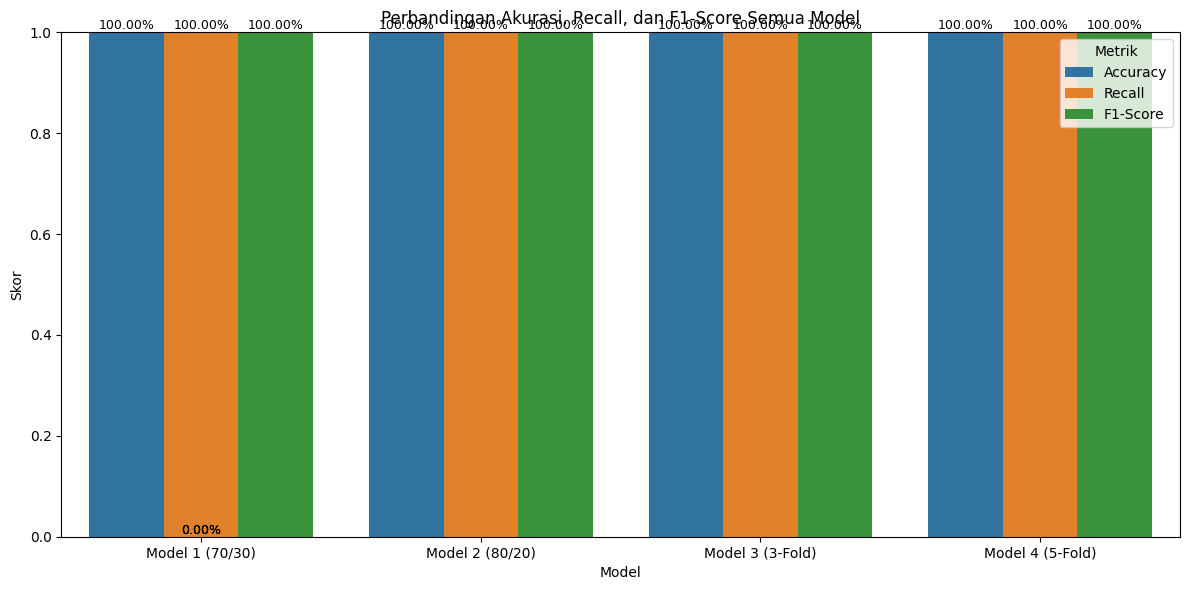

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['Model 1 (70/30)', 'Model 2 (80/20)', 'Model 3 (3-Fold)', 'Model 4 (5-Fold)']
accuracies = [akurasi_1, akurasi_2, akurasi_3, akurasi_4]
recalls = [recall_1, recall_2, recall_3, recall_4]
f1_scores = [f1_1, f1_2, f1_3, f1_4]

# Gabungkan semua ke dalam DataFrame
data = {
    'Model': model_names * 3,
    'Score': accuracies + recalls + f1_scores,
    'Metric': ['Accuracy']*4 + ['Recall']*4 + ['F1-Score']*4
}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=df, x='Model', y='Score', hue='Metric')
plt.ylim(0, 1)
plt.title('Perbandingan Akurasi, Recall, dan F1-Score Semua Model')
plt.ylabel('Skor')
plt.xlabel('Model')
plt.legend(title='Metrik')

# Tambahkan label persen ke atas bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height*100:.2f}%',                # format ke persen
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [43]:
import pandas as pd
import math
import json
from graphviz import Digraph

# 1. Baca dataset dari CSV
col_names = ['IPK', 'Pendapatan', 'JumlahTanggungan', 'Keputusan']
df = pd.read_csv("/content/dataset beasiswa.csv", header=None, names=col_names, skiprows=1)

le_keputusan = LabelEncoder()
df['IPK'] = df['IPK'].replace({',': '.'}, regex=True).astype(float)
df['Pendapatan'] = df['Pendapatan'].replace({',': ''}, regex=True).astype(float)
df['JumlahTanggungan'] = pd.to_numeric(df['JumlahTanggungan'])

# 2. Binning (Diskretisasi)
df['PendapatanBin'] = pd.cut(df['Pendapatan'],
    bins=[0, 3000000, 6000000, df['Pendapatan'].max()],
    labels=['≤3jt','3-6jt','>6jt'])

df['IPKBin'] = pd.cut(df['IPK'],
    bins=[0, 3.0, 3.5, df['IPK'].max()],
    labels=['<3.0','3.0-3.5','>3.5'])

# 2. Ubah DataFrame jadi list of dict
# data = df.to_dict(orient='records')
data = df[['IPKBin', 'PendapatanBin', 'JumlahTanggungan', 'Keputusan']].to_dict(orient='records')

# 3. Fungsi Entropy
def entropy(data, target_attr):
    freq = {}
    for row in data:
        label = row[target_attr]
        freq[label] = freq.get(label, 0) + 1
    total = len(data)
    ent = 0.0
    for count in freq.values():
        p = count / total
        ent -= p * math.log2(p)
    return ent

# 4. Fungsi Info Gain
def info_gain(data, attr, target_attr):
    values = {}
    for row in data:
        key = row[attr]
        values.setdefault(key, []).append(row)

    subset_entropy = 0.0
    for subset in values.values():
        weight = len(subset) / len(data)
        subset_entropy += weight * entropy(subset, target_attr)

    return entropy(data, target_attr) - subset_entropy

# 5. Majority class
def majority_class(data, target_attr):
    counts = {}
    for row in data:
        label = row[target_attr]
        counts[label] = counts.get(label, 0) + 1
    return max(counts, key=counts.get)

# 6. Build Tree
def build_tree(data, attributes, target_attr):
    labels = [row[target_attr] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]

    if not attributes:
        return majority_class(data, target_attr)

    best_attr = max(attributes, key=lambda attr: info_gain(data, attr, target_attr))
    tree = {'attribute': best_attr, 'branches': {}}

    attr_values = set(row[best_attr] for row in data)
    for val in attr_values:
        subset = [row for row in data if row[best_attr] == val]
        if not subset:
            tree['branches'][val] = majority_class(data, target_attr)
        else:
            remaining_attrs = [a for a in attributes if a != best_attr]
            tree['branches'][val] = build_tree(subset, remaining_attrs, target_attr)
    return tree

# 7. Fungsi prediksi
def predict(tree, instance):
    if isinstance(tree, str):
        return tree
    attr = tree['attribute']
    val = instance.get(attr)
    branch = tree['branches'].get(val)
    if branch is None:
        return "Unknown"
    return predict(branch, instance)

# 8. Simpan tree ke JSON
def save_tree_json(tree, filename):
    with open(filename, 'w') as f:
        json.dump(tree, f, indent=4)

def visualize_tree(tree, output='tree_visual'):
    dot = Digraph()
    visited_edges = set()

    def add_nodes_edges(node, parent=None, label=None):
        node_id = str(id(node))

        if isinstance(node, (str, int)):
            dot.node(node_id, label=str(node), shape='box', style='filled', color='lightgreen')
        else:
            dot.node(node_id, label=node['attribute'], shape='ellipse', style='filled', color='lightblue')

            if 'branches' in node:
                for val, subtree in node['branches'].items():
                    child_id = str(id(subtree))
                    add_nodes_edges(subtree, node_id, val)

                    edge_key = (node_id, child_id, val)
                    if edge_key not in visited_edges:
                        visited_edges.add(edge_key)
                        dot.edge(node_id, child_id, label=str(val))

        if parent:
            edge_key = (parent, node_id, label)
            if edge_key not in visited_edges:
                visited_edges.add(edge_key)
                dot.edge(parent, node_id, label=str(label))

    add_nodes_edges(tree)
    dot.render(output, format='png', cleanup=True)
    print(f"Pohon keputusan disimpan sebagai {output}.png")

# 9. Visualisasi pohon keputusan tanpa panah duplikat
# def visualize_tree(tree, output='tree_visual'):
#     dot = Digraph()
#     visited_edges = set()  # Untuk menghindari panah duplikat

#     def add_nodes_edges(node, parent=None, label=None):
#         node_id = str(id(node))

#         if isinstance(node, str):
#             dot.node(node_id, label=node, shape='box', style='filled', color='lightgreen')
#         else:
#             dot.node(node_id, label=node['attribute'], shape='ellipse', style='filled', color='lightblue')
#             for val, subtree in node['branches'].items():
#                 child_id = str(id(subtree))
#                 add_nodes_edges(subtree, node_id, val)

#                 edge_key = (node_id, child_id, val)
#                 if edge_key not in visited_edges:
#                     visited_edges.add(edge_key)
#                     dot.edge(node_id, child_id, label=val)

#         if parent:
#             edge_key = (parent, node_id, label)
#             if edge_key not in visited_edges:
#                 visited_edges.add(edge_key)
#                 dot.edge(parent, node_id, label=label)

#     add_nodes_edges(tree)
#     dot.render(output, format='png', cleanup=True)
#     print(f"Pohon keputusan disimpan sebagai {output}.png")

# 10. Jalankan proses pembuatan decision tree dan visualisasinya
# attributes = ['IPK', 'Pendapatan', 'JumlahTanggungan']
attributes = ['IPKBin', 'PendapatanBin', 'JumlahTanggungan']
target = 'Keputusan'

tree = build_tree(data, attributes, target)
save_tree_json(tree, 'tree.json')
visualize_tree(tree, 'decision_tree_manual')

# 11. Contoh prediksi
new_data = {'IPK': 3.6, 'Pendapatan': 3000000, 'JumlahTanggungan': 3}
print("Prediksi:", predict(tree, new_data))


Pohon keputusan disimpan sebagai decision_tree_manual.png
Prediksi: Unknown


In [44]:
# versi menampilkan gini dan entropy

import pandas as pd
import math
import json
from graphviz import Digraph

# 1. Baca dataset dari CSV
col_names = ['IPK', 'Pendapatan', 'JumlahTanggungan', 'Keputusan']
df = pd.read_csv("/content/dataset beasiswa.csv", header=None, names=col_names, skiprows=1)

le_keputusan = LabelEncoder()
df['IPK'] = df['IPK'].replace({',': '.'}, regex=True).astype(float)
df['Pendapatan'] = df['Pendapatan'].replace({',': ''}, regex=True).astype(float)
df['JumlahTanggungan'] = pd.to_numeric(df['JumlahTanggungan'])

# 2. Binning (Diskretisasi)
df['PendapatanBin'] = pd.cut(df['Pendapatan'],
    bins=[0, 3000000, 6000000, df['Pendapatan'].max()],
    labels=['≤3jt','3-6jt','>6jt'])

df['IPKBin'] = pd.cut(df['IPK'],
    bins=[0, 3.0, 3.5, df['IPK'].max()],
    labels=['<3.0','3.0-3.5','>3.5'])

# 2. Ubah DataFrame jadi list of dict
# data = df.to_dict(orient='records')
data = df[['IPKBin', 'PendapatanBin', 'JumlahTanggungan', 'Keputusan']].to_dict(orient='records')

# 3. Fungsi Entropy
def entropy(data, target_attr):
    freq = {}
    for row in data:
        label = row[target_attr]
        freq[label] = freq.get(label, 0) + 1
    total = len(data)
    ent = 0.0
    for count in freq.values():
        p = count / total
        ent -= p * math.log2(p)
    return round(ent, 4)

# 4. Fungsi Gini
def gini(data, target_attr):
    freq = {}
    for row in data:
        label = row[target_attr]
        freq[label] = freq.get(label, 0) + 1
    total = len(data)
    gini_index = 1.0
    for count in freq.values():
        p = count / total
        gini_index -= p ** 2
    return round(gini_index, 4)

# 5. Majority class
def majority_class(data, target_attr):
    counts = {}
    for row in data:
        label = row[target_attr]
        counts[label] = counts.get(label, 0) + 1
    return max(counts, key=counts.get)

# 6. Build Tree with entropy & gini on each edge
def build_tree(data, attributes, target_attr):
    labels = [row[target_attr] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]

    if not attributes:
        return majority_class(data, target_attr)

    def info_gain(data, attr):
        values = {}
        for row in data:
            key = row[attr]
            values.setdefault(key, []).append(row)

        subset_entropy = 0.0
        for subset in values.values():
            weight = len(subset) / len(data)
            subset_entropy += weight * entropy(subset, target_attr)

        return entropy(data, target_attr) - subset_entropy

    best_attr = max(attributes, key=lambda attr: info_gain(data, attr))
    tree = {
        'attribute': best_attr,
        'branches': {}
    }

    attr_values = set(row[best_attr] for row in data)
    for val in attr_values:
        subset = [row for row in data if row[best_attr] == val]
        if not subset:
            tree['branches'][val] = {
                'entropy': 0.0,
                'gini': 0.0,
                'node': majority_class(data, target_attr)
            }
        else:
            remaining_attrs = [a for a in attributes if a != best_attr]
            subtree = build_tree(subset, remaining_attrs, target_attr)
            tree['branches'][val] = {
                'entropy': entropy(subset, target_attr),
                'gini': gini(subset, target_attr),
                'node': subtree
            }

    return tree

# 7. Visualisasi Tree (dengan entropy & gini di edge)
def visualize_tree(tree, output='tree_visual'):
    dot = Digraph()
    visited_edges = set()

    def add_nodes_edges(node, parent=None, label=None, entropy_val=None, gini_val=None):
        node_id = str(id(node))

        if isinstance(node, str):
            dot.node(node_id, label=node, shape='box', style='filled', color='lightgreen')
        else:
            dot.node(node_id, label=node['attribute'], shape='ellipse', style='filled', color='lightblue')
            for val, branch in node['branches'].items():
                child = branch['node']
                entropy_val = branch['entropy']
                gini_val = branch['gini']
                child_id = str(id(child))
                add_nodes_edges(child, node_id, val, entropy_val, gini_val)

                edge_key = (node_id, child_id, val)
                if edge_key not in visited_edges:
                    visited_edges.add(edge_key)
                    dot.edge(node_id, child_id, label=f"{val}\nEntropy={entropy_val:.4f}\nGini={gini_val:.4f}")

        if parent:
            edge_key = (parent, node_id, label)
            if edge_key not in visited_edges:
                visited_edges.add(edge_key)
                dot.edge(parent, node_id, label=f"{label}\nEntropy={entropy_val:.4f}\nGini={gini_val:.4f}")

    add_nodes_edges(tree)
    dot.render(output, format='png', cleanup=True)
    print(f"Pohon keputusan disimpan sebagai {output}.png")

# 8. Simpan ke JSON
def save_tree_json(tree, filename):
    with open(filename, 'w') as f:
        json.dump(tree, f, indent=4)

# 9. Fungsi Prediksi
def predict(tree, instance):
    if isinstance(tree, str):
        return tree
    attr = tree['attribute']
    val = instance.get(attr)
    branch = tree['branches'].get(val)
    if branch is None:
        return "Unknown"
    return predict(branch['node'], instance)

# 10. Jalankan
# attributes = ['IPK', 'Pendapatan', 'JumlahTanggungan']
attributes = ['IPKBin', 'PendapatanBin', 'JumlahTanggungan']
target = 'Keputusan'

tree = build_tree(data, attributes, target)
save_tree_json(tree, 'tree_with_entropy_and_gini.json')
visualize_tree(tree, 'decision_tree_with_entropy_and_gini')

# 11. Contoh Prediksi
new_data = {'IPK': 3.6, 'Pendapatan': 3000000, 'JumlahTanggungan': 3}
print("Prediksi:", predict(tree, new_data))


Pohon keputusan disimpan sebagai decision_tree_with_entropy_and_gini.png
Prediksi: Unknown


In [ ]:
# import json
# from graphviz import Digraph

# def add_nodes_edges(dot, tree, parent=None, edge_label=None):
#     node_id = id(tree)
#     dot.node(str(node_id), tree['label'], shape='ellipse', style='filled', color='lightblue')
#     if parent:
#         dot.edge(str(parent), str(node_id), label=str(edge_label))
#     if 'branches' in tree:
#         for branch_value, subtree in tree['branches'].items():
#             add_nodes_edges(dot, subtree, node_id, branch_value)

# def create_tree_graph(tree_json_path, output_filename):
#     with open(tree_json_path, 'r') as f:
#         tree = json.load(f)

#     dot = Digraph(comment='Decision Tree with Info Gain', format='png')
#     add_nodes_edges(dot, tree)
#     dot.render(output_filename)
#     print(f'Gambar pohon keputusan tersimpan sebagai {output_filename}.png')

# if __name__ == "__main__":
#     create_tree_graph('tree.json', 'decision_tree_with_gain')


In [ ]:
# chatgpt: https://chatgpt.com/share/68775bd6-a104-800b-9a8e-957e7771727a